In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
df = pd.read_csv("dataset/dataset.csv")

In [5]:
df

P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  ...  P12  P13  P14  P15  P16   
0      4   5   4   5   5   4   3   3   4    5  ...    4    5    4    2    4  \
1      4   3   3   3   4   3   2   2   3    4  ...    3    4    3    1    3   
2      5   5   5   5   4   5   4   3   5    5  ...    5    5    4    2    5   
3      3   4   3   4   3   4   2   2   3    4  ...    3    4    3    1    3   
4      4   5   4   5   5   4   3   3   4    5  ...    4    5    4    2    4   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
6034   2   4   2   5   1   5   4   4   5    1  ...    5    5    1    4    5   
6035   3   3   3   4   2   3   4   4   4    3  ...    4    4    2    3    4   
6036   2   4   3   5   1   5   4   4   5    1  ...    5    5    1    4    5   
6037   1   3   4   4   2   3   4   4   4    3  ...    4    4    2    3    4   
6038   2   4   2   5   1   5   4   4   5    1  ...    5    5    1    4    5   

      P17  P18  P19  P20            Major  
0       5    3    4    2  ComputerScience  
1       4    2    3    1  ComputerScience  
2       5    4    5    2  ComputerScience  
3       4    2    3    1  ComputerScience  
4       5    3    4    2  ComputerScience  
...   ...  ...  ...  ...              ...  
6034    5    5    1    4          Nursing  
6035    4    4    2    3          Nursing  
6036    5    5    1    4          Nursing  
6037    4    4    2    3          Nursing  
6038    5    5    1    4          Nursing  

[6039 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P1      6039 non-null   int64 
 1   P2      6039 non-null   int64 
 2   P3      6039 non-null   int64 
 3   P4      6039 non-null   int64 
 4   P5      6039 non-null   int64 
 5   P6      6039 non-null   int64 
 6   P7      6039 non-null   int64 
 7   P8      6039 non-null   int64 
 8   P9      6039 non-null   int64 
 9   P10     6039 non-null   int64 
 10  P11     6039 non-null   int64 
 11  P12     6039 non-null   int64 
 12  P13     6039 non-null   int64 
 13  P14     6039 non-null   int64 
 14  P15     6039 non-null   int64 
 15  P16     6039 non-null   int64 
 16  P17     6039 non-null   int64 
 17  P18     6039 non-null   int64 
 18  P19     6039 non-null   int64 
 19  P20     6039 non-null   int64 
 20  Major   6039 non-null   object
dtypes: int64(20), object(1)
memory usage: 990.9+ KB


In [7]:
df.isnull().sum()

P1       0
P2       0
P3       0
P4       0
P5       0
P6       0
P7       0
P8       0
P9       0
P10      0
P11      0
P12      0
P13      0
P14      0
P15      0
P16      0
P17      0
P18      0
P19      0
P20      0
Major    0
dtype: int64

In [31]:
df['Major'].unique()

array(['ComputerScience', 'Engineering', 'Sociology', 'Public Relations',
       'Psychology', 'Political Science', 'Physics', 'Pharmacy',
       'Mathematics', 'Criminology', 'Journalism', 'History', 'Geography',
       'English Literature', 'Ecology', 'Economics', 'Design',
       'Chemistry', 'Biology', 'Architecture', 'Anthropology', 'Nursing'],
      dtype=object)

In [10]:
X = df.iloc[:,0:20]
y = df['Major']

In [11]:
X

P1  P2  P3  P4  P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  P15  P16   
0      4   5   4   5   5   4   3   3   4    5    3    4    5    4    2    4  \
1      4   3   3   3   4   3   2   2   3    4    2    3    4    3    1    3   
2      5   5   5   5   4   5   4   3   5    5    4    5    5    4    2    5   
3      3   4   3   4   3   4   2   2   3    4    2    3    4    3    1    3   
4      4   5   4   5   5   4   3   3   4    5    3    4    5    4    2    4   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
6034   2   4   2   5   1   5   4   4   5    1    4    5    5    1    4    5   
6035   3   3   3   4   2   3   4   4   4    3    4    4    4    2    3    4   
6036   2   4   3   5   1   5   4   4   5    1    4    5    5    1    4    5   
6037   1   3   4   4   2   3   4   4   4    3    4    4    4    2    3    4   
6038   2   4   2   5   1   5   4   4   5    1    4    5    5    1    4    5   

      P17  P18  P19  P20  
0       5    3    4    2  
1       4    2    3    1  
2       5    4    5    2  
3       4    2    3    1  
4       5    3    4    2  
...   ...  ...  ...  ...  
6034    5    5    1    4  
6035    4    4    2    3  
6036    5    5    1    4  
6037    4    4    2    3  
6038    5    5    1    4  

[6039 rows x 20 columns]

In [12]:
y

0       ComputerScience
1       ComputerScience
2       ComputerScience
3       ComputerScience
4       ComputerScience
             ...       
6034            Nursing
6035            Nursing
6036            Nursing
6037            Nursing
6038            Nursing
Name: Major, Length: 6039, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

# Decission Tree

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test)

d:\github\capstone_project\.env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [15]:
print("akurasi:" ,metrics.accuracy_score(y_test, y_pred))

akurasi: 0.8532008830022075


In [19]:
y_pred = clf.predict([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [20]:
y_pred

array(['Sociology'], dtype=object)

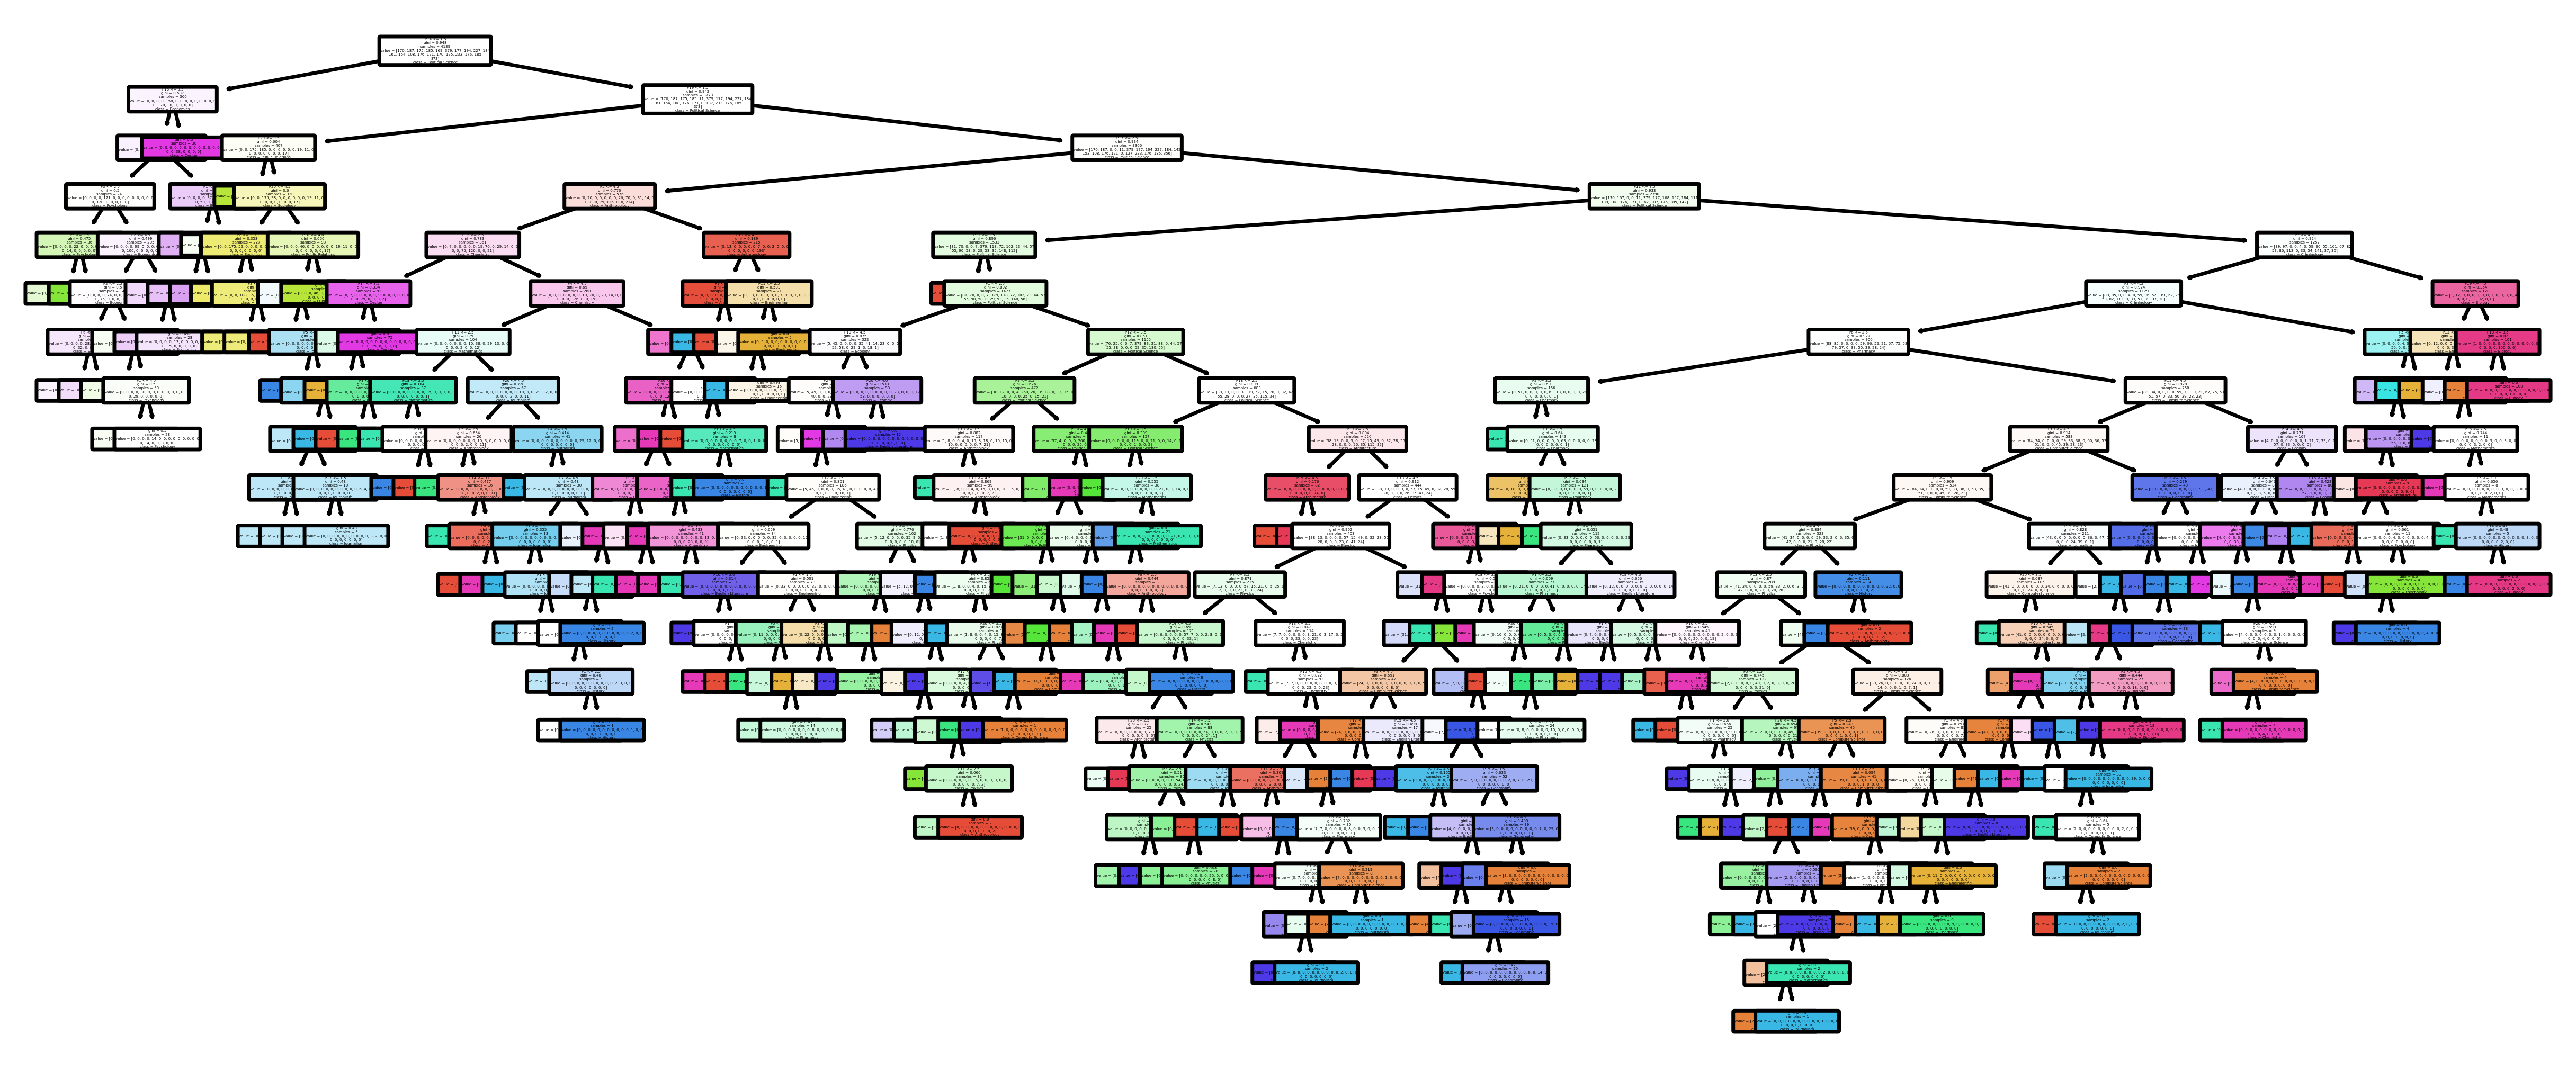

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt


features_cols = ['P1', 'P2', 'P3', 'P4', 'P5','P6', 'P7', 'P8', 'P9', 'P10','P11', 'P12', 'P13', 'P14', 'P15','P16', 'P17', 'P18', 'P19', 'P20']
plt.figure(figsize=(12,5), dpi=500)
tree.plot_tree(clf,
               feature_names=features_cols,
               class_names=['ComputerScience', 'Engineering', 'Sociology', 'Public Relations',
       'Psychology', 'Political Science', 'Physics', 'Pharmacy',
       'Mathematics', 'Criminology', 'Journalism', 'History', 'Geography',
       'English Literature', 'Ecology', 'Economics', 'Design',
       'Chemistry', 'Biology', 'Architecture', 'Anthropology'],
               filled=True,
               rounded=True
               );


In [68]:
y_pred = clf.predict_proba([[4, 3, 5, 1, 4, 3, 5, 4, 2, 2, 3, 4, 3, 2, 5, 3, 1, 4, 1, 4]])

d:\github\capstone_project\.env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# XGBOST

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [28]:
print("akurasi:" ,metrics.accuracy_score(y_test, y_pred))

akurasi: 0.5044150110375276


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3 = clf3.fit(X_train.values, y_train.values)
y_pred = clf3.predict(X_test)
print("akurasi:" ,metrics.accuracy_score(y_test, y_pred))

akurasi: 0.304083885209713


d:\github\capstone_project\.env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Tensorflow

In [30]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [34]:
df_n = df.to_numpy()

In [ ]:
import numpy as np

np.random.shuffle(X)
Xn_train, Xn_test, yn_train, yn_test = X[:80,:], X[80:,:]

In [36]:
X = df_n[:,0:20]
y = df_n[-1]

In [37]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X, y, test_size=0.3, random_state=46)

ValueError: Found input variables with inconsistent numbers of samples: [6039, 21]

In [32]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(22, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(X_train, y_train, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(X_test, y_test)


MODEL TRAINING:
Epoch 1/5


UnimplementedError: Graph execution error:

Detected at node 'Cast_13' defined at (most recent call last):
    File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "d:\github\capstone_project\.env\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "d:\github\capstone_project\.env\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "d:\github\capstone_project\.env\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\github\capstone_project\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "d:\github\capstone_project\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "d:\github\capstone_project\.env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\github\capstone_project\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\github\capstone_project\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\github\capstone_project\.env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_125408\3687169484.py", line 12, in <module>
      model.fit(X_train, y_train, epochs=5)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\github\capstone_project\.env\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "d:\github\capstone_project\.env\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_13'
Cast string to float is not supported
	 [[{{node Cast_13}}]] [Op:__inference_train_function_764]

# Make Label

In [2]:
import csv

# Specify the string you want to add
string_to_add = 'Nursing'

# Read the CSV file and store its contents
with open('dataset/nursing.csv', 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Modify each row by appending the string
for row in rows:
    row.append(string_to_add)

# Write the updated data back to the CSV file
with open('dataset/Nursing.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)


# Generate Data and Label

In [40]:
import csv
import random

# Generate random data
data = []
for _ in range(250):  # Number of rows
    row = []
    for _ in range(20):  # Number of columns
        value = random.randint(1, 5)  # Generate a random integer
        row.append(value)
    data.append(row)

# Save data to a CSV file
filename = 'Religious Studies.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

# Specify the string you want to add
string_to_add = 'Religious Studies'

# Read the CSV file and store its contents
with open('Religious Studies.csv', 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Modify each row by appending the string
for row in rows:
    row.append(string_to_add)

# Write the updated data back to the CSV file
with open('dataset/Religious Studies.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)
